In [24]:
import pandas as pd

from sprime_mapping import map_sprime_segments
from sprime_info import compute_sprime_info

from sprime_mapping_extended import *
from sprime_plotting import *

from utils_bed import *

In [25]:
prefix = "frag_"

In [26]:
# these two files are necessary: score_file with SPrime output and original vcf_file output
vcf_file = "archie.1_biallelic.vcf.gz"
score_file = "sprime.1src.out.100000.score"


In [27]:
# for getting only the introgressed tracts in the target individuals, we also have to provide a list with the individual names (have to correspond to the vcf-file) we are interested in
# if not provided, for all individuals in the vcf-file the introgression status is checked (including reference individuals etc. - this is usually not desired / reasonable, but perhaps one want to check)
tgt_individuals_file = "archie.1.tgt.ind.list"

In [28]:
# if we ant to write the file, also an out_file has to be scpecified
out_file_wo_filtering = prefix + "archie.0.sprime.100000.inferred_wo_filtering.bed"
out_file_every_snp = prefix + "archie.0.sprime.100000.inferred_every_snp.bed"
out_file_frac_50 = prefix + "archie.0.sprime.100000.inferred_fraction_050.bed"
#out_file_frac_100 = "archie.0.sprime.100000.inferred_fraction_100.bed"



In [29]:
# open file with tgt individuals

In [30]:
with open(tgt_individuals_file) as f:
    tgt_individuals = [line.strip() for line in f if line.strip()]


In [31]:
tgt_individuals

['tsk_50',
 'tsk_51',
 'tsk_52',
 'tsk_53',
 'tsk_54',
 'tsk_55',
 'tsk_56',
 'tsk_57',
 'tsk_58',
 'tsk_59']

### Let's also check the sprime output file

In [32]:
df = pd.read_csv(score_file, sep="\t")

# Count the number of SNPs per SEGMENT
snp_counts = df['SEGMENT'].value_counts()

snp_counts_df = snp_counts.reset_index()
snp_counts_df.columns = ['SEGMENT', 'SNP_COUNT']

print(snp_counts_df)
print(snp_counts_df["SNP_COUNT"].sum())

    SEGMENT  SNP_COUNT
0         0         75
1         1         47
2         4         42
3         5         36
4         2         31
5         3         30
6        11         29
7        10         28
8         6         27
9         7         24
10        9         23
11        8         22
12       13         21
13       12         20
455


In [33]:
score_file


'sprime.1src.out.100000.score'

In [34]:
df

,CHROM,POS,ID,REF,ALT,SEGMENT,ALLELE,SCORE
0,1,238504,690,A,G,10,1,101748
1,1,251513,719,G,C,10,1,101748
2,1,255766,727,A,G,10,1,101748
3,1,257368,732,A,G,10,1,101748
4,1,257723,735,T,C,10,1,101748
...,...,...,...,...,...,...,...,...
450,1,22028445,58199,G,A,3,1,137085
451,1,22033401,58220,G,T,3,1,137085
452,1,22036294,58227,A,C,3,0,137085
453,1,22038925,58233,T,C,3,1,137085


In [35]:
runinfo = map_sprime_segments_within_segment_structure(
    score_file,
    vcf_file,
    target_individuals=tgt_individuals,
    phased=True,
)

In [36]:
runinfo

,chrom,segment,individual,haplotype,n_snps,n_introgressed,introgressed_fraction,segment_snps,introgressed_flags,run_lengths_snps,...,gap_lengths_bps,mean_run_snps,var_run_snps,mean_run_bps,var_run_bps,mean_gap_snps,var_gap_snps,mean_gap_bps,var_gap_bps,uninformative_snps
0,1,10,tsk_50,1,28,28,1.000000,"[238504, 251513, 255766, 257368, 257723, 25802...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[28],...,[],28.0,0.000000,75836.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,"[239188, 239299, 239703, 240303, 240597, 24209..."
1,1,10,tsk_50,2,28,0,0.000000,"[238504, 251513, 255766, 257368, 257723, 25802...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],...,[75836],0.0,0.000000,0.000000,0.000000e+00,28.0,0.000000,75836.000000,0.000000e+00,"[239188, 239299, 239703, 240303, 240597, 24209..."
2,1,10,tsk_52,1,28,7,0.250000,"[238504, 251513, 255766, 257368, 257723, 25802...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",[7],...,[45786],7.0,0.000000,29387.000000,0.000000e+00,21.0,0.000000,45786.000000,0.000000e+00,"[239188, 239299, 239703, 240303, 240597, 24209..."
3,1,10,tsk_52,2,28,0,0.000000,"[238504, 251513, 255766, 257368, 257723, 25802...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],...,[75836],0.0,0.000000,0.000000,0.000000e+00,28.0,0.000000,75836.000000,0.000000e+00,"[239188, 239299, 239703, 240303, 240597, 24209..."
4,1,10,tsk_53,1,28,9,0.321429,"[238504, 251513, 255766, 257368, 257723, 25802...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",[9],...,[32425],9.0,0.000000,41155.000000,0.000000e+00,19.0,0.000000,32425.000000,0.000000e+00,"[239188, 239299, 239703, 240303, 240597, 24209..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,1,tsk_57,2,47,1,0.021277,"[21541283, 21541302, 21542755, 21544262, 21544...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1],...,"[19366, 113030]",1.0,0.000000,0.000000,0.000000e+00,23.0,36.000000,66198.000000,2.193236e+09,"[21541776, 21542081, 21542564, 21542778, 21542..."
76,1,1,tsk_59,1,47,1,0.021277,"[21541283, 21541302, 21542755, 21544262, 21544...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1],...,"[19366, 113030]",1.0,0.000000,0.000000,0.000000e+00,23.0,36.000000,66198.000000,2.193236e+09,"[21541776, 21542081, 21542564, 21542778, 21542..."
77,1,1,tsk_59,2,47,1,0.021277,"[21541283, 21541302, 21542755, 21544262, 21544...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1],...,"[19366, 113030]",1.0,0.000000,0.000000,0.000000e+00,23.0,36.000000,66198.000000,2.193236e+09,"[21541776, 21542081, 21542564, 21542778, 21542..."
78,1,3,tsk_56,1,30,24,0.800000,"[21905012, 21906798, 21911405, 21915067, 21916...","[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...","[6, 5, 5, 3, 1, 4]",...,"[5201, 0, 0, 0, 0]",4.0,2.666667,10018.166667,4.400352e+07,1.2,0.160000,1040.200000,4.328064e+06,"[21905262, 21905630, 21906182, 21907300, 21908..."


In [37]:
runinfo_postprocessed_full = fragments_from_segment_structure_with_metadata(
    runinfo,
    min_snps=5,
    max_gap=1,
)

In [38]:
true_tracts_file = "archie.1.true.tracts.bed"
true_tracts_bed = pd.read_csv(true_tracts_file, sep="\t", names=["chromosome", "start", "end", "individual_haplotype"])

In [39]:
bed_df = fragments_to_bed(runinfo_postprocessed_full, bed_file="fragments_archie_minsnps_5_maxgap_1.bed")

In [40]:
bed_df

,chrom,start,end,individual_haplotype
1,1,238504,267892,tsk_52_1
2,1,238504,279660,tsk_53_1
0,1,238504,314341,tsk_50_1
3,1,238504,314341,tsk_57_1
4,1,267891,314341,tsk_58_2
5,1,5117493,5206181,tsk_57_1
6,1,7527606,7577775,tsk_58_1
7,1,7642986,7721370,tsk_58_1
8,1,8413208,8484292,tsk_56_2
9,1,9931398,10038950,tsk_53_1


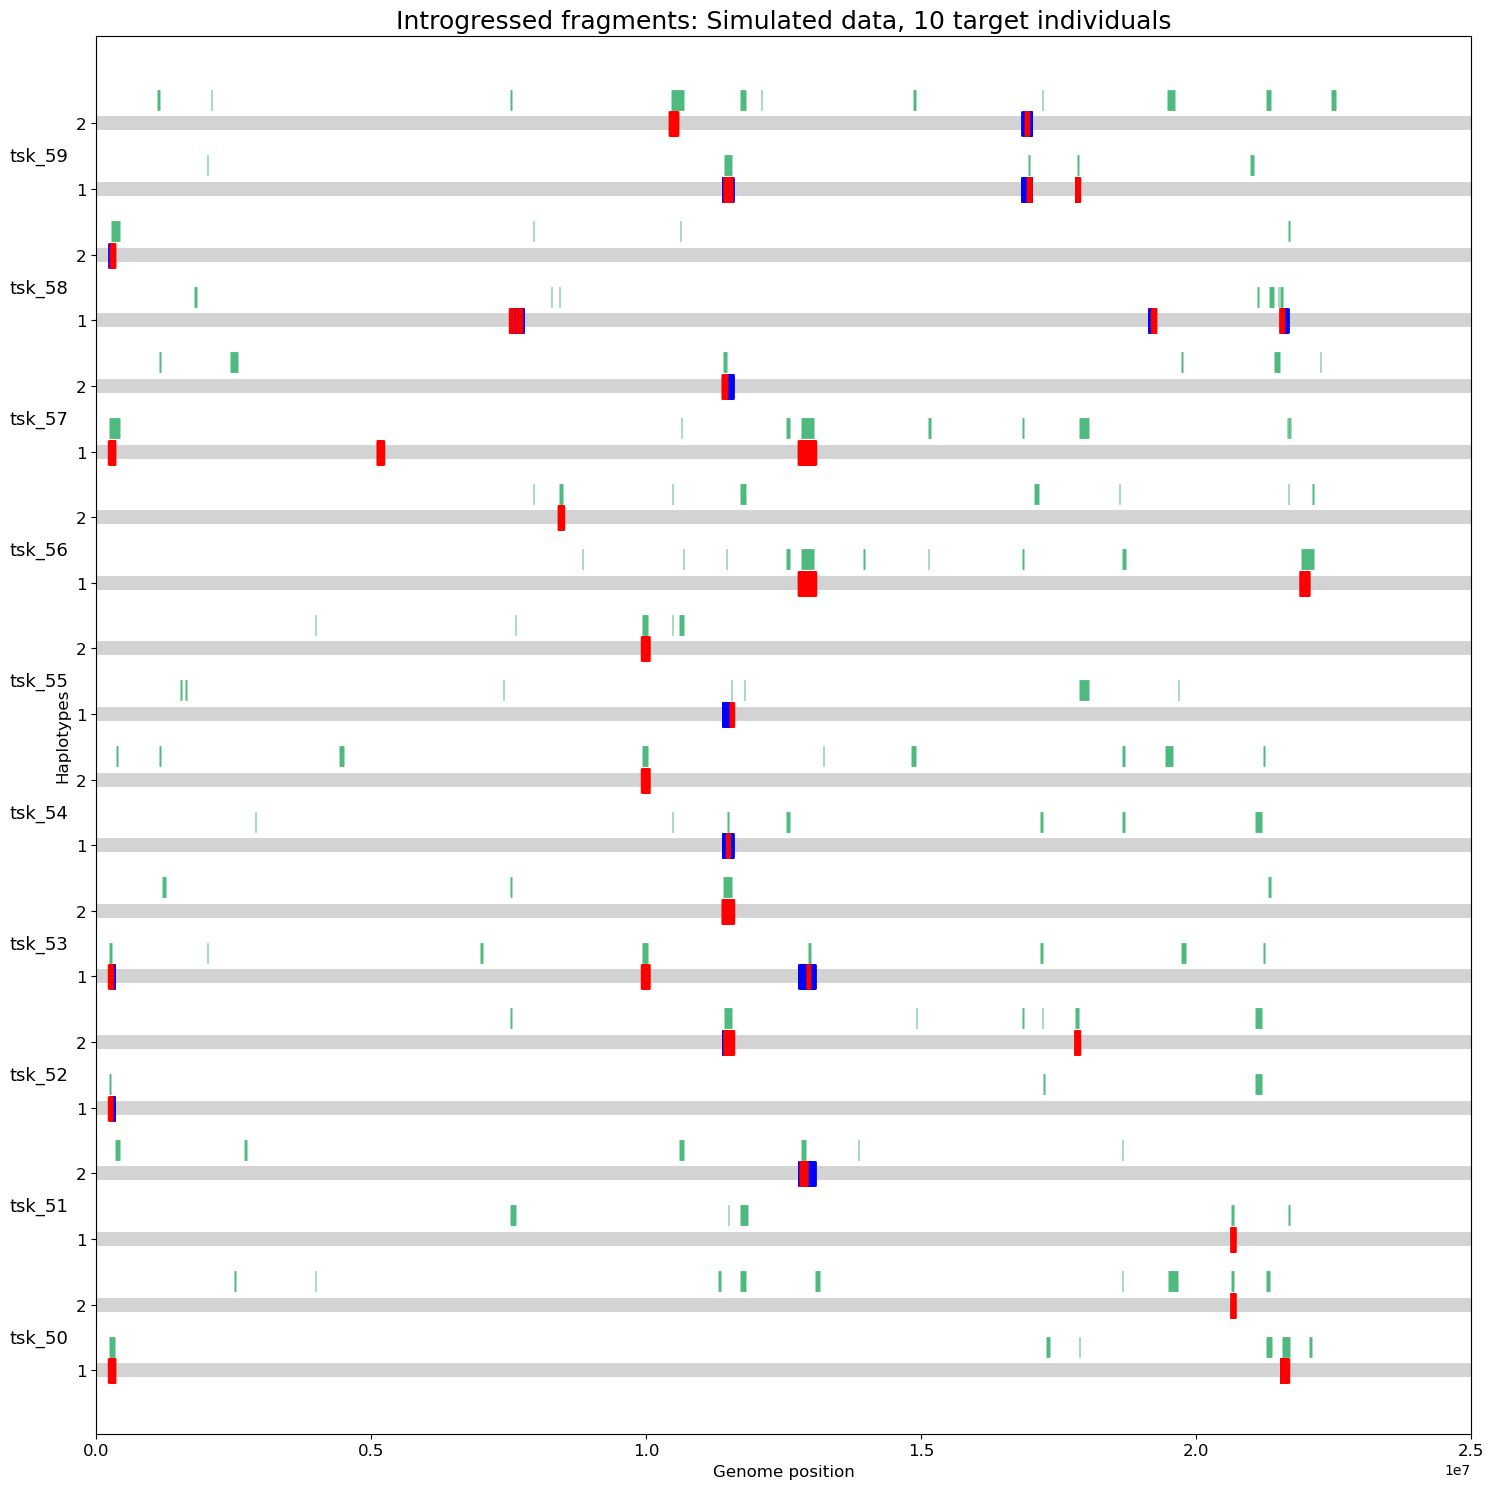

In [49]:
plot_introgression_fragments(runinfo_postprocessed_full, inter_hap_spacing=0.05,inter_ind_spacing=0.1, plot_uninformative_snps=False, title="Introgressed fragments: Simulated data, 10 target individuals", genome_length=25000000, label_fragments=False, true_tracts_bed=true_tracts_bed, segments_to_plot=None, true_tract_offset=0.45)

In [42]:
runinfo_postprocessed_full

,chrom,segment,individual,haplotype,n_snps,n_introgressed,introgressed_fraction,segment_snps,introgressed_flags,uninformative_snps,start,end,nsnps,fragment_positions
0,1,10,tsk_50,1,28,28,1.000000,"[238504, 251513, 255766, 257368, 257723, 25802...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[239188, 239299, 239703, 240303, 240597, 24209...",238504,314341,28,"[238504, 251513, 255766, 257368, 257723, 25802..."
1,1,10,tsk_52,1,28,7,0.250000,"[238504, 251513, 255766, 257368, 257723, 25802...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[239188, 239299, 239703, 240303, 240597, 24209...",238504,267892,7,"[238504, 251513, 255766, 257368, 257723, 25802..."
2,1,10,tsk_53,1,28,9,0.321429,"[238504, 251513, 255766, 257368, 257723, 25802...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[239188, 239299, 239703, 240303, 240597, 24209...",238504,279660,9,"[238504, 251513, 255766, 257368, 257723, 25802..."
3,1,10,tsk_57,1,28,28,1.000000,"[238504, 251513, 255766, 257368, 257723, 25802...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[239188, 239299, 239703, 240303, 240597, 24209...",238504,314341,28,"[238504, 251513, 255766, 257368, 257723, 25802..."
4,1,10,tsk_58,2,28,22,0.785714,"[238504, 251513, 255766, 257368, 257723, 25802...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[239188, 239299, 239703, 240303, 240597, 24209...",267891,314341,22,"[267891, 268554, 279659, 281915, 290557, 29327..."
5,1,7,tsk_57,1,24,23,0.958333,"[5117493, 5118816, 5127403, 5136424, 5143862, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5118033, 5118942, 5119860, 5120138, 5120178, ...",5117493,5206181,23,"[5117493, 5118816, 5127403, 5136424, 5143862, ..."
6,1,8,tsk_58,1,22,12,0.545455,"[7527606, 7546836, 7549606, 7555063, 7560551, ...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...","[7527843, 7528397, 7528758, 7528904, 7528944, ...",7527606,7577775,6,"[7527606, 7546836, 7549606, 7555063, 7560551, ..."
7,1,8,tsk_58,1,22,12,0.545455,"[7527606, 7546836, 7549606, 7555063, 7560551, ...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...","[7527843, 7528397, 7528758, 7528904, 7528944, ...",7642986,7721370,6,"[7642986, 7643977, 7666754, 7682624, 7702375, ..."
8,1,11,tsk_56,2,29,29,1.000000,"[8413208, 8418944, 8423046, 8430926, 8432462, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[8413590, 8415223, 8415517, 8415856, 8415902, ...",8413208,8484292,29,"[8413208, 8418944, 8423046, 8430926, 8432462, ..."
9,1,6,tsk_53,1,27,27,1.000000,"[9931398, 9939286, 9945995, 9946088, 9951559, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[9932525, 9932834, 9933239, 9934541, 9934618, ...",9931398,10038950,27,"[9931398, 9939286, 9945995, 9946088, 9951559, ..."


In [43]:
df_full = map_sprime_segments_with_full_structure(
    score_file,
    vcf_file,
    target_individuals=tgt_individuals,
    phased=True,
)

In [44]:
df_full

,chrom,segment,individual,haplotype,n_snps,n_introgressed,introgressed_fraction,segment_snps,introgressed_flags,run_lengths_snps,run_lengths_bps,gap_lengths_snps,gap_lengths_bps,uninformative_snps
0,1,10,tsk_50,1,28,28,1.00,"[238504, 251513, 255766, 257368, 257723, 25802...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[28],[75836],[],[],"[239188, 239299, 239703, 240303, 240597, 24209..."
1,1,10,tsk_50,2,28,0,0.00,"[238504, 251513, 255766, 257368, 257723, 25802...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[28],[75836],"[239188, 239299, 239703, 240303, 240597, 24209..."
2,1,10,tsk_51,1,28,0,0.00,"[238504, 251513, 255766, 257368, 257723, 25802...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[28],[75836],"[239188, 239299, 239703, 240303, 240597, 24209..."
3,1,10,tsk_51,2,28,0,0.00,"[238504, 251513, 255766, 257368, 257723, 25802...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[28],[75836],"[239188, 239299, 239703, 240303, 240597, 24209..."
4,1,10,tsk_52,1,28,7,0.25,"[238504, 251513, 255766, 257368, 257723, 25802...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",[7],[29387],[21],[45786],"[239188, 239299, 239703, 240303, 240597, 24209..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1,3,tsk_57,2,30,0,0.00,"[21905012, 21906798, 21911405, 21915067, 21916...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[30],[136819],"[21905262, 21905630, 21906182, 21907300, 21908..."
276,1,3,tsk_58,1,30,0,0.00,"[21905012, 21906798, 21911405, 21915067, 21916...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[30],[136819],"[21905262, 21905630, 21906182, 21907300, 21908..."
277,1,3,tsk_58,2,30,0,0.00,"[21905012, 21906798, 21911405, 21915067, 21916...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[30],[136819],"[21905262, 21905630, 21906182, 21907300, 21908..."
278,1,3,tsk_59,1,30,0,0.00,"[21905012, 21906798, 21911405, 21915067, 21916...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[30],[136819],"[21905262, 21905630, 21906182, 21907300, 21908..."


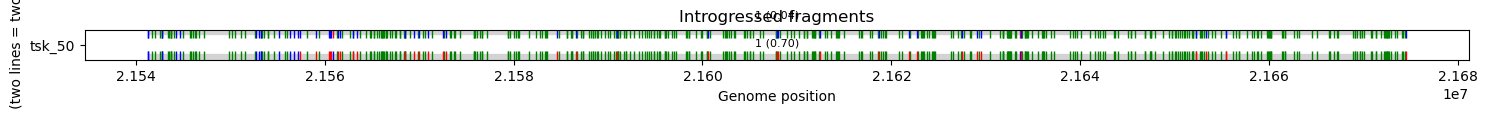

In [45]:
plot_introgression_full_genome(runinfo, exclude_empty_segments=True, individuals_to_plot=["tsk_50"], segments_to_plot=[1])

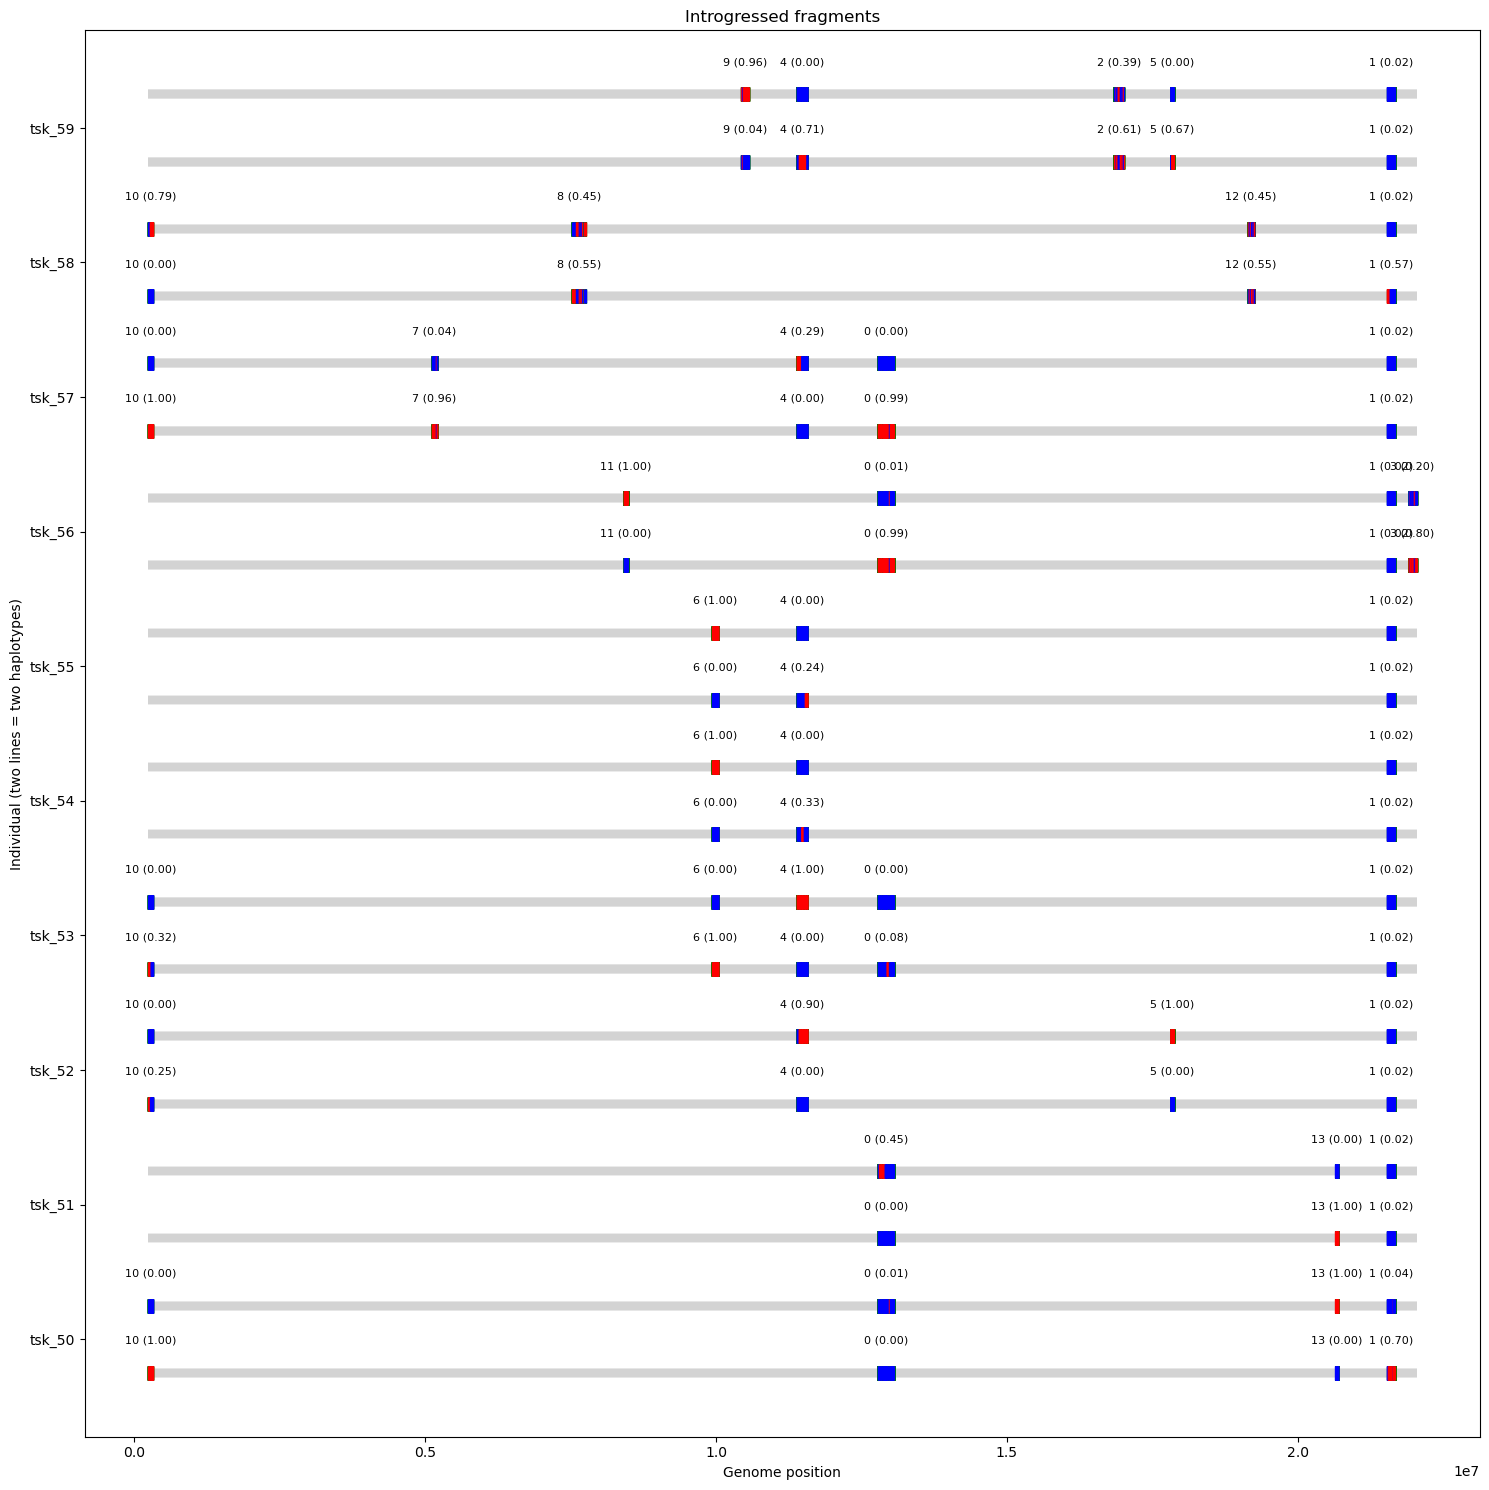

In [46]:
plot_introgression_full_genome(runinfo, exclude_empty_segments=False)